In [1]:
#Set up the libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Step 1: Getting the data
heart_data = pd.read_csv("OwnProject/heart.csv")

In [3]:
#Looking at the data
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
#Assigning X features and Y as label to get it ready for training
X = heart_data.drop(columns="target") #Dropped because we are trying to predict the target with given info
Y = heart_data["target"] #Y will act sorta like a validation 

In [5]:
#Test to make sure X does not include target column
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [6]:
#Check the targets of Y
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [7]:
#Next we will split the data for training and testing purposes
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2) # Following a recommended split for test and training

In [8]:
#lets look at the training samples
X_train,Y_train

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 148   44    1   2       120   226    0        1      169      0      0.0   
 219   48    1   0       130   256    1        0      150      1      0.0   
 46    44    1   2       140   235    0        0      180      0      0.0   
 187   54    1   0       124   266    0        0      109      1      2.2   
 263   63    0   0       108   269    0        1      169      1      1.8   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 211   61    1   0       120   260    0        1      140      1      3.6   
 226   62    1   1       120   281    0        0      103      0      1.4   
 235   51    1   0       140   299    0        1      173      1      1.6   
 5     57    1   0       140   192    0        1      148      0      0.4   
 113   43    1   0       110   211    0        1      161      0      0.0   
 
      slope  ca  thal  
 148      2   0     2  
 219      2   2     3  
 4

In [9]:
#Lets look at the testing
X_test, Y_test

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 192   54    1   0       120   188    0        1      113      0      1.4   
 241   59    0   0       174   249    0        1      143      1      0.0   
 253   67    1   0       100   299    0        0      125      1      0.9   
 21    44    1   2       130   233    0        1      179      1      0.4   
 300   68    1   0       144   193    1        1      141      0      3.4   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 286   59    1   3       134   204    0        1      162      0      0.8   
 43    53    0   0       130   264    0        0      143      0      0.4   
 103   42    1   2       120   240    1        1      194      0      0.8   
 179   57    1   0       150   276    0        0      112      1      0.6   
 233   64    1   0       120   246    0        0       96      1      2.2   
 
      slope  ca  thal  
 192      1   1     3  
 241      1   0     2  
 2

In [10]:
#Time to pick a good estimator (model). A good resource I found is to use the scikit-learn machine learning map
#Can be found at https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

len(heart_data) # To make sure we have more than 50 data as it suggests

303

In [11]:
#We have more than 50 samples, and we are predicting a category so now we have to chose between a classification problem
#or clustering. Since we have labeled data, we will use the classifcation approach
#Now that we have determined our problem type, we can see we have <100k samples
#Therefore we will use what it recomends us,  Linear svm
from sklearn import svm
clf = svm.SVC()

In [12]:
#Time to fit the data (train)
clf.fit(X_train,Y_train)

SVC()

In [13]:
#Predict the data
y_probs = clf.predict(X_test)

In [14]:
y_probs

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0], dtype=int64)

In [15]:
#Evalutate the model
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_probs)

0.6721311475409836

In [23]:
#Improve the model by hypertuning the SVM param
np.random.seed(50)
pltDict = {}
for i in range(1000,500000,10000):
    print(f"Trying model with C value {i}:")
    clf = svm.SVC(C=i).fit(X_train, Y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, Y_test) * 100:.2f}%")
    pltDict[i]=clf.score(X_test, Y_test) * 100
    print("")

Trying model with C value 1000:
Model accuracy on test set: 75.41%

Trying model with C value 11000:
Model accuracy on test set: 72.13%

Trying model with C value 21000:
Model accuracy on test set: 73.77%

Trying model with C value 31000:
Model accuracy on test set: 73.77%

Trying model with C value 41000:
Model accuracy on test set: 73.77%

Trying model with C value 51000:
Model accuracy on test set: 75.41%

Trying model with C value 61000:
Model accuracy on test set: 75.41%

Trying model with C value 71000:
Model accuracy on test set: 75.41%

Trying model with C value 81000:
Model accuracy on test set: 75.41%

Trying model with C value 91000:
Model accuracy on test set: 75.41%

Trying model with C value 101000:
Model accuracy on test set: 75.41%

Trying model with C value 111000:
Model accuracy on test set: 75.41%

Trying model with C value 121000:
Model accuracy on test set: 75.41%

Trying model with C value 131000:
Model accuracy on test set: 75.41%

Trying model with C value 14100

In [25]:
#View dictionary to confirm if the percentages match up
pltDict

{1000: 75.40983606557377,
 11000: 72.1311475409836,
 21000: 73.77049180327869,
 31000: 73.77049180327869,
 41000: 73.77049180327869,
 51000: 75.40983606557377,
 61000: 75.40983606557377,
 71000: 75.40983606557377,
 81000: 75.40983606557377,
 91000: 75.40983606557377,
 101000: 75.40983606557377,
 111000: 75.40983606557377,
 121000: 75.40983606557377,
 131000: 75.40983606557377,
 141000: 77.04918032786885,
 151000: 77.04918032786885,
 161000: 77.04918032786885,
 171000: 77.04918032786885,
 181000: 77.04918032786885,
 191000: 77.04918032786885,
 201000: 77.04918032786885,
 211000: 77.04918032786885,
 221000: 77.04918032786885,
 231000: 77.04918032786885,
 241000: 77.04918032786885,
 251000: 77.04918032786885,
 261000: 77.04918032786885,
 271000: 77.04918032786885,
 281000: 77.04918032786885,
 291000: 77.04918032786885,
 301000: 77.04918032786885,
 311000: 77.04918032786885,
 321000: 77.04918032786885,
 331000: 77.04918032786885,
 341000: 77.04918032786885,
 351000: 77.04918032786885,
 361

Max C value: 491000, gives accuracy of 78.68852459016394
Min C value: 1000, gives accuracy of 72.1311475409836


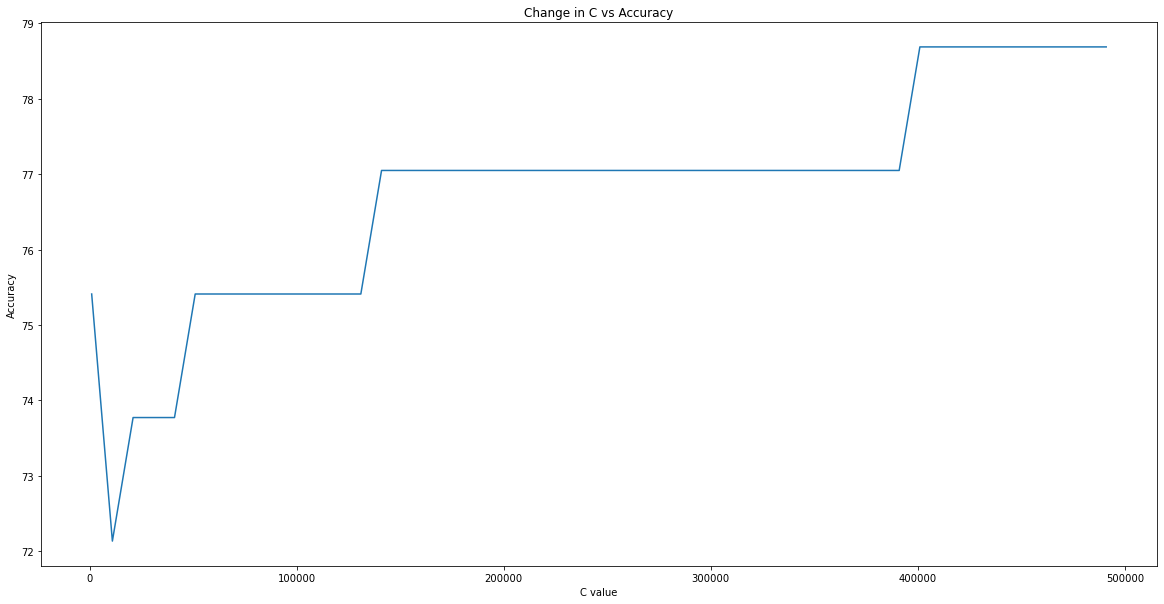

In [38]:
#PLot the data to see which yields in the highest accuracy 
Xaxis = list(pltDict.keys())
Yaxis = list(pltDict.values())
fig,ax= plt.subplots(figsize=(20,10))
ax.plot(Xaxis,Yaxis)
ax.set(title="Change in C vs Accuracy", xlabel="C value", ylabel="Accuracy");
print(f"Max C value: {max(Xaxis)}, gives accuracy of {max(Yaxis)}")
print(f"Min C value: {min(Xaxis)}, gives accuracy of {min(Yaxis)}")

In [ ]:
#Observation the higher the C value, the better the accuracy gets after C value of 1000

In [39]:
#Now, we have to decide if the small increase in accuracy is worth giving up on perfomance. The parameter C will be tested on
#At C=1000 accuracy shows to be about 72%
#At C=491,000 accuracy shows to reach peak at 78.68%
C_1000  = %timeit svm.SVC(C=1000)
C_491000 = %timeit svm.SVC(C=491000)
C_1000,C_491000

3.49 µs ± 50 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
3.48 µs ± 45.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


(None, None)

In [45]:
#Conclusion: The bigger the C value does not always correlate to better accuracy. You have to find the right paramter that will
#tweek it just enough to increase it to its best accuracy. Ways I could improve is by cleaning out data or filling in data.
clf = svm.SVC(C=491000)
clf.fit(X_train,Y_train)
y_probs = clf.predict(X_test)
clf.score(X_test, Y_test) * 100

78.68852459016394

In [47]:
#Save model and loading a model
import pickle
pickle.dump(clf,open("Heart_disease_project.pkl","wb"))#save file
load_pickle = pickle.load(open("Heart_disease_project.pkl","rb"))
load_pickle.score(X_test,Y_test)*100

78.68852459016394

In [56]:
#Now just to make sure it truly works lets compare the results with its true target
clf.predict(X_test),np.array(Y_test)

(array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0], dtype=int64),
 array([0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
        1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64))